<a href="https://colab.research.google.com/github/journalWheat/CSI4106-Project1/blob/main/CSI4106_Project1_JaredWagner_WineDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Title: Predicting the colour of a wine using Naive Bayes, Logistic Regression, and Multi-Layer Perceptron learning algorithms**

##**GROUP 97**
####@AUTHOR JARED WAGNER (Student \#300010832), Fall 2022.
####Submitted for CSI4106, Introduction to Artificial Intelligence. 
#####Project repository: https://github.com/journalWheat/CSI4106-Project1

#**Section 1: Introduction and goals**
-----
##An ode to wine
```
Hey come lets scatter flowers around,
and fill the chalice up with wine.
We'll crack the heavens' vault in half,
and hew a wholly new design. 
(Excerpt from 'Wine, Humans and Song,' translated from medieval Persian poet Hafez.)
``` 
([Source](http://poemsintranslation.blogspot.com/2015/07/hafiz-ghazal-367-human-wine-and-song.html?m=1)) + ([Info on Hafez](https://en.wikipedia.org/wiki/Hafez))

Wine, dear wine:

You have profoundly impacted the world. Though many people abstain from you, those who partake in consuming you become mind-bent by your company. Sommeliers might be the most mind-bent of us, specializing in combining their senses with their knowledge about wine's history to make appropriately fancy recommendations: what wine to pair with your salmon or your steak, what wine to bring to a house party, what wine to bring on a first date, and so on and so forth.

This is not a new phenomenon. The first evidence of grape wine production dates to 6100 years ago in an Armenian cave ([Source](https://www.decanter.com/wine-news/armenian-find-is-world-s-oldest-winery-42433/)). Dating back even further, anywhere from 9000 to 11000 years ago, there is evidence of a grape and rice wine being produced in China ([Source](https://www.sciencedirect.com/science/article/pii/S2212977418300619?via%3Dihub)). Perhaps humans' historied fixation upon wine is why in March 2020, a disputed story went viral across social media that claimed a group of elephants had broken into a village in China, "drinking 30kg of corn wine [before] they fell asleep in a nearby tea garden." ([Source](https://www.wusa9.com/article/news/verify/verify-did-elephants-get-drunk-on-corn-wine-while-humans-were-social-distancing/507-0c48ef63-33ec-478f-be6a-4ebdeb4b0299#:~:text=The%20tweet%20claimed%20the%20elephants,every%20instance%20of%20this%20post.))

Sommeliers with the most sensitive olfactory senses go on to write wine manuals (or so the story goes). These textbooks outline the expected characteristics of a peppery Australian Shiraz vs. a fruitful French Pinot Noir; of a vintage from 1980 vs. the same wine produced just last year. Many of these manuals even compare wines from different regions within a country, or sub-regions within a province, state, or territory. If your Chianti didn't come from the Chianti region of Tuscany, Italy, you may be entitled to compensation as part of a class action lawsuit. 

That was a joke, but it has a grain of truth. Many jurisdictions, including Italy, France, and even Ontario, have strict regulations for wine manufacture and labelling. In-order, these are called the DOP, AOC, and VQA standards. This is to be expected, given that the wine industry is a highly profitable sector: in 2019, the Canadian wine industry alone was valued at $11.57 billion dollars. ([source](https://www.winegrowerscanada.ca/our-industry/economic-impact/))

-----
##Data and goals
The dataset used in this analysis contains samples of various Viho Verde style wines from Portugal (the famous origin of "port" style wines), first published in 2009. The data was taken from Kaggle, where it had been shared from the UCI Machine Learning Repository.

This dataset is purportedly intended for models that would rank the wines, since there is an attached 'quality' metric for each sample. However, after seeing that each wine was also categorized by 'type' ('red'/'white'), this brought to mind an infamous study from 2001 ([source](http://www.daysyn.com/Morrot.pdf)) where 54 students training to become sommeliers were fooled by experimentors who had dyed white wine red. 

From the researchers' mischief, the students described the "red white wine" as they would a red wine, even though they had previously described the same white wine entirely differently when they had known it was a white wine with stereotypical character of a white wine. Few of the students consistently described the wine before and after it had been dyed, leading the researchers to suggest that the visual appearance of wine had a large affect on the participants' other senses. (Various news agencies were less charitable. In 2014, Gizmodo published an article "Wine tasting is bullshit. Here's why." ([Source](https://gizmodo.com/wine-tasting-is-bullshit-heres-why-496098276)) which cited the study to prove that "expert wine critics can't distinguish between red and white wines").

###The spurring of a question
Although the primary goal of this report's analysis is to compare the relative strengths of pitfalls associated with Naive Bayes, Logistic, and Multi-Layer Perceptron models, this story with the sommeliers leads to my personal tongue-in-cheek question: "can a computer guess whether a wine is red or white better than a a sommelier?" 

To answer this question, I will train three classification models using the aforementioned algorithms to determine whether a wine is 'white' or 'red' from the given features in the data set. Because there are only two classes, this is a binary classification problem. From these models, I will:
- Compare and contrast the effectiveness of each model for this task.
- Explore these models with a hands-on approach.
- Compare the sommeliers' performance to "a computer's" performance, i.e. my models.

###Applications
The question "can a computer guess whether a wine is red or white better than a sommelier," although humorous, has a real-world value. On its face it has entertainment value (otherwise no articles would be written about it), but looking closer it also conjours up questions about wine curation as a profession. If a computer can be a "virtual sommelier," then one can think of all kinds of applications for that. Exploring one example, imagine filling out a questionnaire from an app on your phone about your wine preferences, and then zap! Your phone returns a list of 10 wines it thinks that you will enjoy. No hiring a specialist, no wasting time, you know exactly what you want after 2 minutes with the app. 

Of course the results of this experiment do not *directly* fit into that example, but the models designed here could be components of that application. For example, if these models characterize a white wine as a red, then this could be a clue that this "white" wine has a red-like flavor profile that will not be appreciated as much by a person who does not like red wine.
#**Section 2: Analyzing the dataset -- MUST ADD**
-----
##Analyzing the dataset

In [194]:
# data from: https://www.kaggle.com/datasets/rajyellow46/wine-quality
# seaborn docs: https://seaborn.pydata.org/tutorial/distributions.html
# imports for data processing
import pandas as pd
import numpy as np

# imports and settings for nice graphs
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.notebook_repr_html', True)
sns.set_palette(palette='deep')
sns.set_style(style='ticks')

# df info: location, target column
df_location = 'https://raw.githubusercontent.com/journalWheat/CSI4106-Project1/main/winequalityN.csv' 
sample_location = 'https://raw.githubusercontent.com/journalWheat/CSI4106-Project1/main/sample.csv'
target = 'type'

# read data
raw_df = pd.read_csv(df_location)

##Transformations

In [195]:
# re-reading the data from CSV such that it is (reproducibly) randomized
seed = 1

raw_df = pd.read_csv(df_location).dropna().sample(n=len(pd.read_csv(df_location).dropna()),random_state=seed)
med_sample_df = raw_df[43:643].copy() # sample of 600
small_sample_df = raw_df[43:143].copy() # sample of 100

# display the data to demonstrate it is shuffled ... no matter how many times this cell is ran, the order of the data will be the same since it is shuffled from a seed
display(raw_df.head(5))

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3746,white,7.4,0.27,0.28,1.8,0.040,45.0,121.0,0.99043,3.02,0.40,11.9,5
425,white,7.0,0.21,0.28,8.7,0.045,37.0,222.0,0.99540,3.25,0.54,10.4,6
3967,white,6.3,0.27,0.51,7.6,0.049,35.0,200.0,0.99548,3.16,0.54,9.4,4
6098,red,7.7,0.57,0.21,1.5,0.069,4.0,9.0,0.99458,3.16,0.54,9.8,6
3184,white,6.2,0.10,0.41,1.0,0.040,17.0,76.0,0.98988,3.14,0.56,11.4,7


#**Section 3: Feature Selection - MUST ADD**

In [196]:
model_features = {'total sulfur dioxide', 'chlorides', 'volatile acidity', 'residual sugar'}

#**Section 4: Encoding features - NEED TO RE-WRITE**
-----


In [197]:
 # qcut: https://stackoverflow.com/questions/53963183/how-to-use-kbinsdiscretizer-to-make-continuous-data-into-bins-in-sklearn
 # get_dummies: https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python

def one_hot_encode(raw, target, features, n_buckets):
  # get a dataframe with the features we care about
  df = raw[features].copy()

  # use Pandas to replace the values in each dataframe with the quantile they belong to
  for column in df:
    df[column] = pd.qcut(df[column], q=(n_buckets+1), labels=False)

  # expand each column out into mutually exclusive columns
  for column in df:
    onehot_columns = pd.get_dummies(df[column], prefix=column+' ',prefix_sep='', drop_first=True)
    df = pd.concat([df, onehot_columns],axis=1)
    df = df.drop(column, axis=1)

  # add the target back at the end of the dataframe ... everything have been done inplace, so this is okay
  df = pd.concat([raw_df[target],df],axis=1)
  #df[target] = raw[target].copy()

  return df

encoded_data = one_hot_encode(raw_df, target, model_features, 4)
display(encoded_data.head(2)) # sneak peak to see the data looks as expected

,type,chlorides 1,chlorides 2,chlorides 3,chlorides 4,volatile acidity 1,volatile acidity 2,volatile acidity 3,volatile acidity 4,residual sugar 1,residual sugar 2,residual sugar 3,residual sugar 4,total sulfur dioxide 1,total sulfur dioxide 2,total sulfur dioxide 3,total sulfur dioxide 4
3746,white,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
425,white,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


-----
#**BELOW IS NOT PART OF THE REPORT ... YET!**
-----

In [198]:
# data from: https://www.kaggle.com/datasets/rajyellow46/wine-quality
# seaborn docs: https://seaborn.pydata.org/tutorial/distributions.html
# imports for data processing
import pandas as pd
import numpy as np

# imports and settings for nice graphs
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.notebook_repr_html', True)
sns.set_palette(palette='deep')
sns.set_style(style='ticks')

# df info: location, target column
df_location = 'https://raw.githubusercontent.com/journalWheat/CSI4106-Project1/main/winequalityN.csv' 
sample_location = 'https://raw.githubusercontent.com/journalWheat/CSI4106-Project1/main/sample.csv'
target = 'type'

# read data
raw_df = pd.read_csv(df_location)
#raw_df = pd.read_csv(df_location).dropna().sample(n=len(pd.read_csv(df_location).dropna()),random_state=1)

#Project requirments
- Perform K-Fold classification on NB, LR, MLP.
  - Get stats: precision, recall; ideally collect other stats as well.
- From stats taken on each model, get:
  - Graphs of each measure, for *class* in the model
  - Meta stats: min, max, variation, *for each
  - TP/FP/TN/FN rates

In [199]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
import pickle

# Performs K-Fold classification on a given classifier, returning a dictionary
# with y_test, y_pred, X_train for each run.
# AN IMPORTANT ASSUMPTION:
# The last iteration of K_fold is kept for analysis in Section 10. 
# This is done using pickle dump/load when K_fold is used.
def K_fold_classifier(data, clf, k=10):
  # Data to be returned to the caller
  prediction_data = {'y_pred' : [],
                     'y_test' : [],
                     'X_test' : [],
                     'clf' : []}

  # Intact feature and prediction sets: X, Y
  X = np.array(data.drop(columns=target, axis=1).values.tolist())
  y = np.array(data[target].values.tolist())

  # Specify the KFold split
  kfold_split = KFold(n_splits=10, random_state=None, shuffle=False)

  # Using the KFold split, fit the given classifier. Each time, we want to store
  # three things: X_test, y_test, y_pred. Why? All metrics about performance can
  # be derived from these values.
  for train_index, test_index in kfold_split.split(data):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # train model
    clf.fit(X_train, y_train)

    # get predictions
    y_pred = clf.predict(X_test)

    # store data on each run
    prediction_data['y_pred'].append(y_pred)
    prediction_data['y_test'].append(y_test)
    prediction_data['X_test'].append(X_test)
    prediction_data['clf'].append(clf)
  
  return prediction_data

In [200]:
from sklearn.metrics import classification_report
import seaborn as sns
def eval_performance_metrics(dictionary_of_predictions, title="Metrics for the model"):
  # pull data
  y_test = dictionary_of_predictions['y_test'].copy()
  y_pred  = dictionary_of_predictions['y_pred'].copy()

  # Prepare to calculate data
  performance = []
  averages = []
  variation = []

  # calculate metrics on each fold using classification_report
  for y_test, y_pred in zip(y_test, y_pred):
    performance.append(classification_report(y_test, y_pred, output_dict=True))


  # prepare to store metrics we care about
  metrics = {'Precision Red' : [],
             'Precision White' : [],
             'Macro Precision' : [],
             'Recall Red' : [],
             'Recall White' : [],
             'Macro Recall' : [],
             'Accuracy' : []} # micro average == accuracy for binary classification

  for evaluation in performance:
    metrics['Precision Red'].append(evaluation['red']['precision'])
    metrics['Recall Red'].append(evaluation['red']['recall']) # true sensitivity where red=(+)
    metrics['Precision White'].append(evaluation['white']['precision'])
    metrics['Recall White'].append(evaluation['white']['recall']) # true specificity where white=(-)
    metrics['Macro Precision'].append(evaluation['macro avg']['precision']) # average precision per class
    metrics['Macro Recall'].append(evaluation['macro avg']['recall']) # average recall per class
    metrics['Accuracy'].append(evaluation['accuracy']) # accuracy of all predictions

  # prepare to take average, variance
  metrics_avg = metrics.copy()
  metrics_var = {}

  # take average, variance
  for key in metrics:
    metrics_avg[key] = np.average(metrics[key])
    metrics_var['Average ' + key] = np.var(metrics[key])

  # plot the results
  keys = list(metrics_avg.keys())
  avg = list(metrics_avg.values())
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  sns.barplot(x=keys, y=avg)

  # display variance tabularly (it is often too small to show on the chart)
  var_data = pd.DataFrame([metrics_var])
  display(var_data)





In [201]:
# Given a dictionary of predictions with y_test, y_pred, X_test, sorts
# X_test into categories for true-positive, false-positive,
# true-negative, and false-negative. The classes and positive class reflect
# the conventions in this report. Since the final clf is used for each model,
# only the LAST set of predictions is parsed
def split_posneg(dictionary_of_predictions, classes={'red','white'}, pos_class='red'):
  # pull data
  y_test = dictionary_of_predictions['y_test'][9].copy()
  y_pred  = dictionary_of_predictions['y_pred'][9].copy()
  X_test  = dictionary_of_predictions['X_test'][9].copy()
  # Prepare for data collection
  posneg = {
      'TP' : [],
      'FP' : [],
      'TN' : [],
      'FN' : []
  }

  for y_test, y_pred, X_test in zip(y_test, y_pred, X_test):
    if ((y_pred == y_test) and y_test==pos_class): # TP
      posneg['TP'].append(X_test)
    elif ((y_pred == y_test) and y_test!=pos_class): # TN
      posneg['TN'].append(X_test)
    elif ((y_pred != y_test) and y_test==pos_class): #FN
      posneg['FN'].append(X_test)
    else: #FP
      posneg['FP'].append(X_test)

  return posneg


,Average Precision Red,Average Precision White,Average Macro Precision,Average Recall Red,Average Recall White,Average Macro Recall,Average Accuracy
0,0.000653,0.000016,0.000129,0.000136,0.000099,0.000011,0.00003


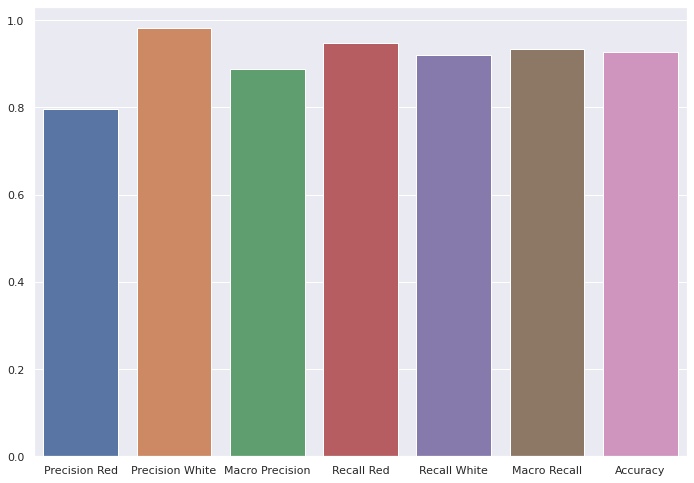

In [203]:
NB_1_clf = MultinomialNB(alpha=1.0,fit_prior=False,class_prior=None)
NB_1_data = K_fold_classifier(encoded_data,NB_1_clf,k=10)
NB_1_clf = NB_1_data['clf'][9]
eval_performance_metrics(NB_1_data)
NB_1_posneg = split_posneg(NB_1_data)